In [ ]:
!pip install pandas

In [2]:
import pandas as pd

df = pd.read_csv('../merged_202204-202303.csv') #csvのDataFrameへの読み込み (UTF-8)
df = df[df["date"]!='date'] # csvをマージした際の不要なラベル行の削除
df["date"] = pd.to_datetime(df["date"]) # date行を文字列から時刻オブジェク換
df["week"] = df["date"].dt.to_period("W") #週次のweek列を追加
df

,date,URL,description,week
0,2022-04-01 09:22:00,https://www-cr-mufg-jp.lgoo666.com/?ja=ulcvg.m...,三菱UFJニコス,2022-03-28/2022-04-03
1,2022-04-01 09:22:00,https://www-cr-mufg-jp.lgoo666.com/select/,三菱UFJニコス,2022-03-28/2022-04-03
2,2022-04-01 09:27:00,https://armzon.veribelcenter.com/,エポスカード,2022-03-28/2022-04-03
3,2022-04-01 09:30:00,https://amaounz.jdfuhrtjt8.top/,Amazon,2022-03-28/2022-04-03
4,2022-04-01 09:33:00,https://www2.epoesnacasn.icu,エポスカード,2022-03-28/2022-04-03
...,...,...,...,...
55412,2023-03-31 15:33:00,https://www.nhk-plus.masterthesuccess.com/,NHK,2023-03-27/2023-04-02
55413,2023-03-31 15:33:00,https://www.nhk-plus.premieregourmet.com/,NHK,2023-03-27/2023-04-02
55414,2023-03-31 15:33:00,https://www.nhk-plus.southernmnmortgage.com/,NHK,2023-03-27/2023-04-02
55415,2023-03-31 15:33:00,https://www.nhk-plus.theitsybitsybouquet.com/,NHK,2023-03-27/2023-04-02


In [4]:
desc_sr = df.groupby(['description'])['URL'].nunique() # 上位30 descriptionを抽出する前処理 pandas Seriesになる
desc_top30_sr = desc_sr.sort_values(ascending=False).head(30) # 降順にして上位30を取得 descriptionがindexになる
desc_top30_sr.index


Index(['三井住友カード', 'au', '三菱UFJニコス', 'Amazon', 'えきねっと', 'イオンカード', 'SAISON CARD',
       '国税庁', 'エポスカード', 'ETC利用照会サービス', 'softbank', 'メルカリ', '楽天', 'Apple ID',
       'JCB', '三越伊勢丹', 'アプラス', 'ヨドバシカメラ', 'ヤマト運輸', 'Viewcard', '三井住友銀行',
       'NHKプラス', 'Orico', 'TS CUBIC CARD_MY TS3', 'ポケットカード', '楽天カード',
       'American Express', 'Yahoo! JAPAN', 'BIGLOBE', 'JACCS'],
      dtype='object', name='description')

In [5]:
top30_df = df[df['description'].isin(desc_top30_sr.index)] # 上位30のdescriptionのみにフィルター
pivot_sr_top30 = top30_df.groupby(['description','week'])['URL'].nunique() # 上位30の週次データの取得  pandas Seriesになる
pivot_df_top30 = pivot_sr_top30.unstack() #  pandas Seriesから Dataframeへの変換
pivot_df_top30.head() # 形式を確認したいだけなので、先頭５つのみ表示している

week,2022-03-28/2022-04-03,2022-04-04/2022-04-10,2022-04-11/2022-04-17,2022-04-18/2022-04-24,2022-04-25/2022-05-01,2022-05-02/2022-05-08,2022-05-09/2022-05-15,2022-05-16/2022-05-22,2022-05-23/2022-05-29,2022-05-30/2022-06-05,...,2023-01-23/2023-01-29,2023-01-30/2023-02-05,2023-02-06/2023-02-12,2023-02-13/2023-02-19,2023-02-20/2023-02-26,2023-02-27/2023-03-05,2023-03-06/2023-03-12,2023-03-13/2023-03-19,2023-03-20/2023-03-26,2023-03-27/2023-04-02
description,,,,,,,,,,,,,,,,,,,,,
Amazon,6.0,24.0,27.0,40.0,45.0,21.0,41.0,77.0,69.0,180.0,...,116.0,72.0,9.0,175.0,8.0,19.0,13.0,22.0,108.0,51.0
American Express,5.0,NaN,9.0,3.0,6.0,4.0,3.0,7.0,9.0,NaN,...,1.0,2.0,1.0,7.0,12.0,10.0,29.0,16.0,1.0,5.0
Apple ID,16.0,65.0,67.0,8.0,9.0,4.0,24.0,1.0,NaN,8.0,...,10.0,18.0,15.0,22.0,125.0,9.0,4.0,87.0,16.0,8.0
BIGLOBE,NaN,3.0,6.0,8.0,10.0,NaN,11.0,8.0,4.0,5.0,...,4.0,3.0,4.0,17.0,7.0,1.0,3.0,7.0,14.0,2.0
ETC利用照会サービス,31.0,47.0,110.0,87.0,119.0,4.0,79.0,44.0,37.0,1.0,...,13.0,20.0,6.0,NaN,2.0,1.0,16.0,39.0,108.0,89.0


In [8]:
# 上位 30のデータ加工
pivot_sr_others = df.groupby(['description','week'])['URL'].nunique().drop(desc_top30_sr.index) # 上位30を除外したSeriesを作成
pivot_sr_others = pivot_sr_others.unstack().sum() # Dataframeにunstack()で一度戻し、合計を取得。 pandas Seriesになる
pivot_sr_others
# 残りをOTHERSとしてデータ加工
pivot_df_others = pd.DataFrame(pivot_sr_others).T # otherに対するDataframeを作成し、.Tで転置変換する
pivot_df_others.index = ['OTHERS'] # OTHERSと index名をつける 
pivot_df_others

week,2022-03-28/2022-04-03,2022-04-04/2022-04-10,2022-04-11/2022-04-17,2022-04-18/2022-04-24,2022-04-25/2022-05-01,2022-05-02/2022-05-08,2022-05-09/2022-05-15,2022-05-16/2022-05-22,2022-05-23/2022-05-29,2022-05-30/2022-06-05,...,2023-01-23/2023-01-29,2023-01-30/2023-02-05,2023-02-06/2023-02-12,2023-02-13/2023-02-19,2023-02-20/2023-02-26,2023-02-27/2023-03-05,2023-03-06/2023-03-12,2023-03-13/2023-03-19,2023-03-20/2023-03-26,2023-03-27/2023-04-02
OTHERS,14.0,106.0,88.0,63.0,55.0,40.0,63.0,40.0,51.0,52.0,...,72.0,39.0,69.0,94.0,73.0,88.0,73.0,123.0,129.0,132.0


In [9]:
pivot_df = pd.concat([pivot_df_top30,pivot_df_others]).T # 上位30とOTHERを合わせたDataframeを作り、行と列を入れ替えた転置行列を取る
pivot_df

,Amazon,American Express,Apple ID,BIGLOBE,ETC利用照会サービス,JACCS,JCB,NHKプラス,Orico,SAISON CARD,...,ヤマト運輸,ヨドバシカメラ,三井住友カード,三井住友銀行,三菱UFJニコス,三越伊勢丹,国税庁,楽天,楽天カード,OTHERS
week,,,,,,,,,,,,,,,,,,,,,
2022-03-28/2022-04-03,6.0,5.0,16.0,NaN,31.0,NaN,6.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,59.0,NaN,NaN,NaN,NaN,14.0
2022-04-04/2022-04-10,24.0,NaN,65.0,3.0,47.0,7.0,15.0,NaN,NaN,80.0,...,NaN,NaN,14.0,3.0,154.0,NaN,NaN,26.0,NaN,106.0
2022-04-11/2022-04-17,27.0,9.0,67.0,6.0,110.0,75.0,26.0,NaN,NaN,6.0,...,NaN,NaN,216.0,1.0,24.0,NaN,NaN,34.0,1.0,88.0
2022-04-18/2022-04-24,40.0,3.0,8.0,8.0,87.0,122.0,39.0,1.0,4.0,6.0,...,NaN,NaN,326.0,1.0,18.0,NaN,NaN,14.0,4.0,63.0
2022-04-25/2022-05-01,45.0,6.0,9.0,10.0,119.0,7.0,54.0,15.0,NaN,11.0,...,NaN,NaN,380.0,14.0,43.0,NaN,NaN,11.0,3.0,55.0
2022-05-02/2022-05-08,21.0,4.0,4.0,NaN,4.0,1.0,48.0,3.0,NaN,NaN,...,NaN,NaN,1.0,NaN,60.0,NaN,NaN,25.0,NaN,40.0
2022-05-09/2022-05-15,41.0,3.0,24.0,11.0,79.0,10.0,62.0,1.0,5.0,174.0,...,NaN,29.0,10.0,NaN,112.0,NaN,NaN,191.0,2.0,63.0
2022-05-16/2022-05-22,77.0,7.0,1.0,8.0,44.0,2.0,220.0,14.0,3.0,58.0,...,NaN,3.0,10.0,5.0,263.0,NaN,NaN,76.0,4.0,40.0
2022-05-23/2022-05-29,69.0,9.0,NaN,4.0,37.0,3.0,37.0,48.0,2.0,99.0,...,3.0,6.0,6.0,1.0,1379.0,NaN,NaN,34.0,2.0,51.0


In [ ]:
!pip install japanize-matplotlib

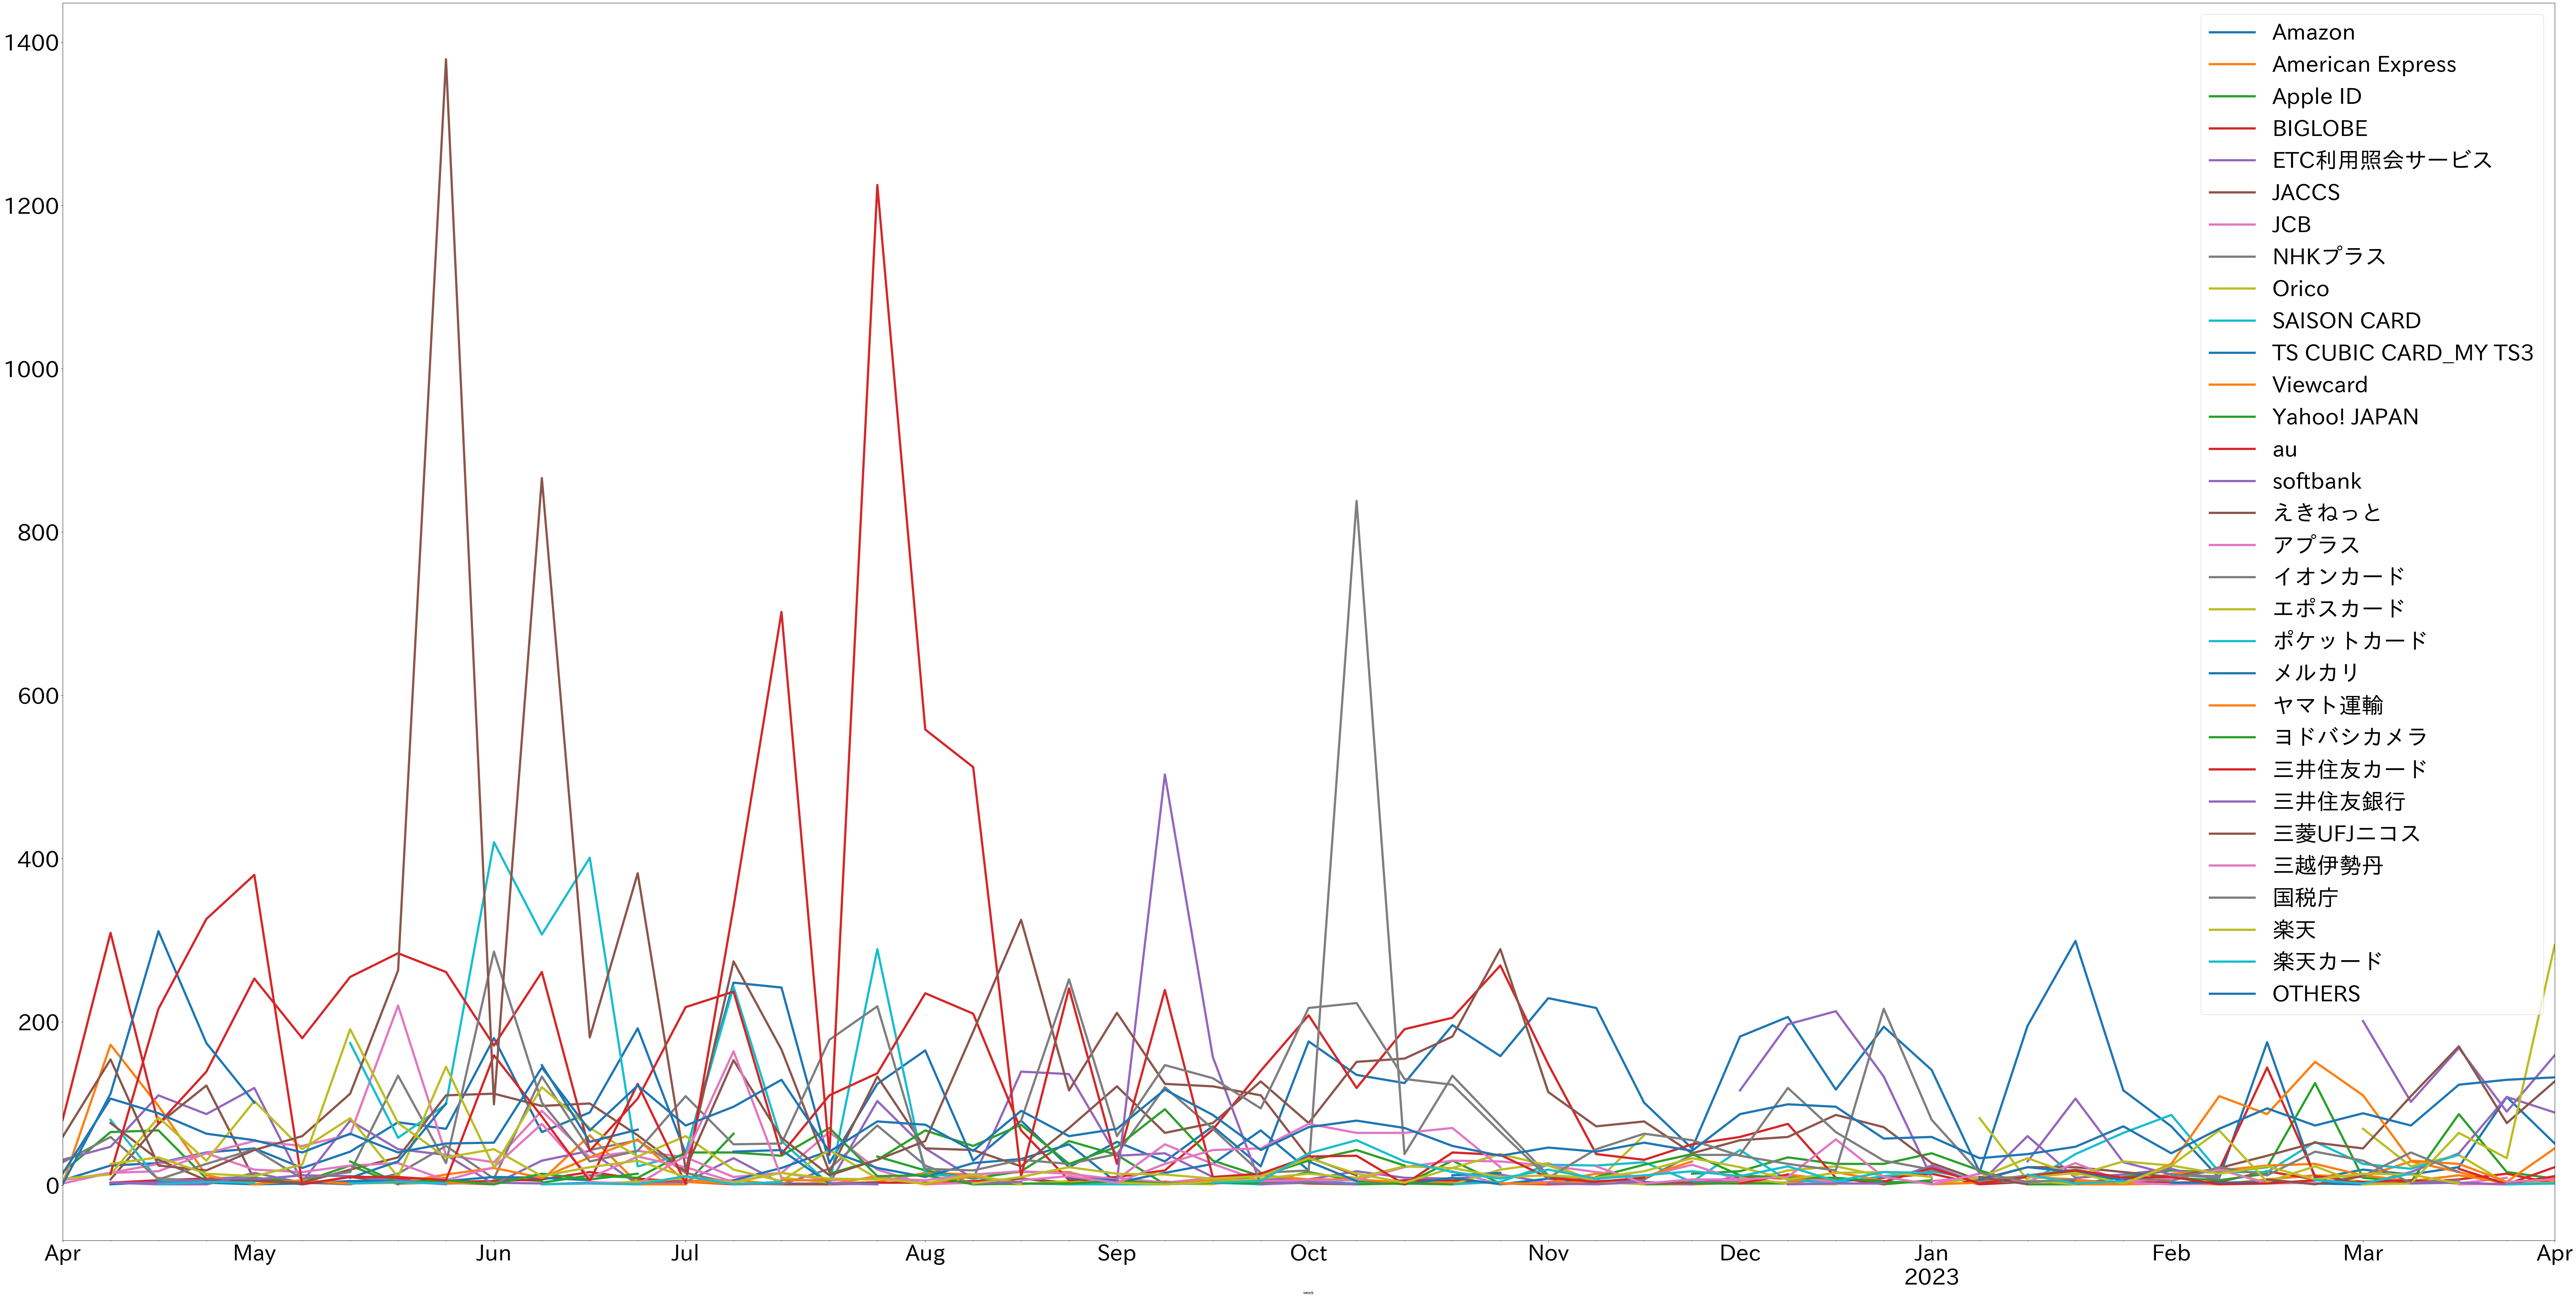

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import japanize_matplotlib #日本語文字化け解消のため (別途　pip install japanize-matplotlib が必要)

pivot_df.plot.line(legend=True,figsize=(100,50),color=mcolors.TABLEAU_COLORS.keys(),fontsize=50,linewidth=5)
plt.legend(fontsize=50)
plt.show()